In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math

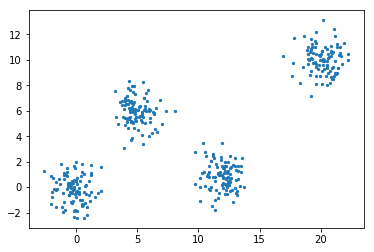

In [41]:
a = np.random.normal([12,1],1,(100,2))
b = np.random.normal([0,0],1,(100,2))
c = np.random.normal([5,6],1,(100,2))
d = np.random.normal([20,10],1,(100,2))
data = np.concatenate((a, b, c, d))
plt.scatter(data[:,0],data[:,1],s = 5)

In [42]:
k = 4
s = 1                                                              #Degree of sparcity(user defined - we'll tune the s we get in the algo to be closer to this)
w = np.array([1/math.sqrt(data.shape[1])] * data.shape[1])
print('Weights:',w)
cs_old = np.zeros((k,data.shape[1]))
cs_new = data[np.random.permutation(data.shape[0])[0:k]]
#cs_new = [[5,2],[1,2]]

print()
print(cs_new)
a = np.zeros(data.shape[1])
p = np.zeros(data.shape[1])
er = np.linalg.norm(cs_new - cs_old)
# print(er)

distance = np.zeros((data.shape[0],k))
cluster_assigned = np.zeros(data.shape[0])
data_mean = np.mean(data,axis = 0)
# print(data_mean)
# print(distance)

Weights: [0.70710678 0.70710678]

[[11.33785584  0.81493073]
 [ 1.02633413 -0.6145293 ]
 [12.20629171  1.94174821]
 [10.85967471  1.16181797]]


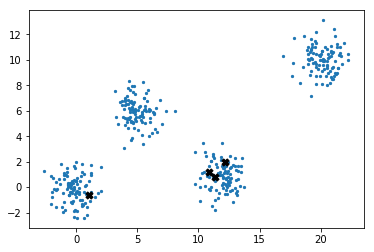

In [43]:
plt.scatter(data[:,0],data[:,1],s = 5,)
plt.scatter(cs_new[:,0],cs_new[:,1],s=50,marker = 'X', c='black')

In [44]:
def calculate_delta(a,b):
    return (a+b)/2

def get_w(a,delta):
    g = np.array(a) - delta 
    for i in range(len(g)):
        if g[i]<0:
            g[i]=0
            
    denominator = 0
    for i in g:
        denominator = denominator + i**2
    w = g/(denominator**0.5)
    return w

def get_s(w):
    s = 0
    for i in range(len(w)):
        s = s + abs(w[i])
    return s

In [45]:
for iter1 in range(100):
    for i in range(k):
        distance[:,i] = np.linalg.norm(w*data - w*cs_new[i],axis=1)**2  
        #print(distance[:,i])
    
    cluster_assigned = np.argmin(np.array(distance),axis = 1)
    cs_old = np.array(cs_new)                                        #Calculate Membership
    
    for i in range(k):
        cs_new[i] = np.mean(data[cluster_assigned==i],axis=0)
    er = np.linalg.norm(cs_new - cs_old)                             #Calculate new cluster centres
    
    
    for i in range(data.shape[1]):
        variance_dist = 0
        for j in range(data.shape[0]):
            variance_dist = variance_dist + np.linalg.norm(data[j][i] - data_mean[i])**2
        print('variance_dist',variance_dist)
        
        within_cluster_dist = 0
        for j in range(k):
            ind = np.where(cluster_assigned == j)[0]
            new_data = np.zeros((len(ind),data.shape[1]))
            for m in range(len(ind)):
                new_data[m] = data[ind[m]]
            within_cluster_dist = within_cluster_dist + np.linalg.norm(new_data[:,i] - cs_new[j][i])**2
        print('within_cluster_dist',within_cluster_dist)
        
        a[i] = 2*(variance_dist - within_cluster_dist)
        
    print('a:',a)
       
    for t in range(data.shape[1]):
        p[t] = a[t]
    p.sort()
    
    if iter1 == 0:
        l = 0
        r = p[-2]
        delta = calculate_delta(l,r)
        w = get_w(a,delta)
        s1 = get_s(w)
        
    while abs(s1-s) > 1e-9:
        #print(abs(s1-s))
        #print(abs(s1-s)<1e-9)
        if s1>s:
            l = delta
        else:
            r = delta
        
        delta = calculate_delta(l,r)
        #print(delta)
        w = get_w(a,delta)
        #print('w',w)
        s1 = get_s(w)
        #print('l1 w', s1)
              
    print('s1:',s1)
    print('l1:',w)
    print('er:',er)
    print('s:',s)
    if er < 1e-9:
        print('#iter', iter1)
        break
        



variance_dist 23701.642697231873
within_cluster_dist 2796.9992360220517
variance_dist 7128.921930828184
within_cluster_dist 3749.9383237761
a: [41809.28692242  6757.9672141 ]
s1: 1.0000000007182437
l1: [1.00000000e+00 7.18243685e-10]
er: 10.25719396498623
s: 1
variance_dist 23701.642697231873
within_cluster_dist 622.144109379911
variance_dist 7128.921930828184
within_cluster_dist 1128.61799598652
a: [46158.9971757  12000.60786968]
s1: 1.0000000007182437
l1: [1.00000000e+00 7.18243685e-10]
er: 3.9803398385968003
s: 1
variance_dist 23701.642697231873
within_cluster_dist 360.92933062035047
variance_dist 7128.921930828184
within_cluster_dist 439.9223026437805
a: [46681.42673322 13377.99925637]
s1: 1.0000000007182437
l1: [1.00000000e+00 7.18243685e-10]
er: 1.3380399361088908
s: 1
variance_dist 23701.642697231873
within_cluster_dist 360.92933062035047
variance_dist 7128.921930828184
within_cluster_dist 439.9223026437805
a: [46681.42673322 13377.99925637]
s1: 1.0000000007182437
l1: [1.0000000

In [46]:
cs_new

array([[11.92043524,  0.87831714],
       [-0.20981342, -0.15451727],
       [20.13657318, 10.02067226],
       [ 4.97468772,  5.93720272]])

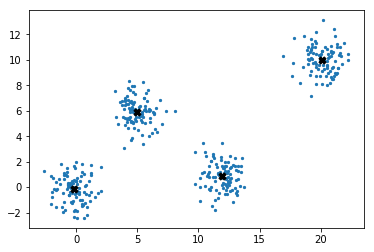

In [47]:
plt.scatter(data[:,0],data[:,1],s = 5,)
plt.scatter(cs_new[:,0],cs_new[:,1],s=50,marker = 'X', c='black')
#plt.scatter(cs_init[:,0],cs_init[:,1],s=50,marker = 'o', c='g', alpha=0.8)

Check if its less than oh greater than s
if less than s:
increase l1norm of w - decrease delta

vice versa